In [10]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


Завдання 1.
Зчитати датасет ВВП (млн. дол. США) за країнами з Вікіпедії за
посиланням
https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)

Розрахуйте частку кожної країни в загальному значенні для кожного
року (MVF_2024, WorldBank_2023, OON_2022). Як змінюються частки
країн з часом (дати відповідь)?

In [106]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Завантаження HTML сторінки
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"

# Знаходимо всі таблиці на сторінці
tables = pd.read_html(url)
df = tables[2]
# df.head()
# df.columns

#Назви стовпців
current_columns = [( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')]

#Зручні назви стовпців
new_columns = [
    'Country',
    'IMF_Forecast',
    'IMF_Year',
    'WorldBank_Estimate',
    'WorldBank_Year',
    'UN_Estimate',
    'UN_Year',
]

df.columns = new_columns
df.head()


,Country,IMF_Forecast,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
0,World,109529216,2024,105435540,2023,100834796,2022
1,United States,28781083,2024,27360935,2023,25744100,2022
2,China,18532633,[n 1]2024,18394782,[n 3]2023,17963170,[n 1]2022
3,Germany,4391100,2024,4256081,2023,4076923,2022
4,Japan,4210452,2024,4212945,2023,4232173,2022


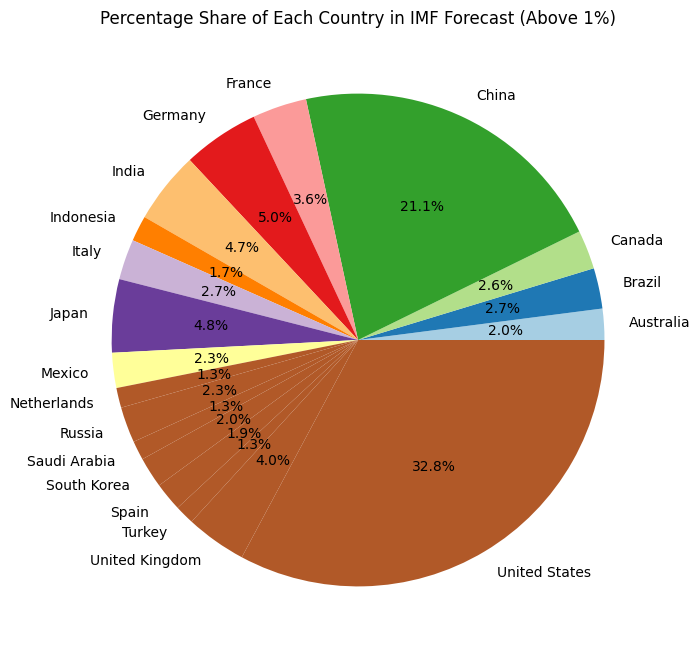

In [109]:
#MVF_2024
import re
import matplotlib.pyplot as plt

# Створюємо копію основного DataFrame для кожного завдання по розрахунку створюю копію датафрейму для того щоб ніяким чином не пошкодити наш оригінальний датасет
df_copy = df.copy()

# Заміна значень з анотаціями на '2024'
def replace_year(value):
    if isinstance(value, str):
        # Заміна всіх варіантів на '2024'
        return '2024' if re.search(r'\[n \d+\]2024', value) else value
    return value

df_copy['IMF_Year'] = df_copy['IMF_Year'].apply(replace_year)

# Фільтруємо дані для 2024 року
df_copy['IMF_Year'] = df_copy['IMF_Year'].where(df_copy['IMF_Year'] == '2024', None)

# Видаляємо рядки з пропусками в 'IMF_Year'
df_copy = df_copy.dropna(subset=['IMF_Year'])

# Перевіряємо чи значення у стовпці IMF_Forecast числові
df_copy['IMF_Forecast'] = pd.to_numeric(df_copy['IMF_Forecast'])

# # Вилучаємо рядок з назвою 'World'
df_copy = df_copy[df_copy['Country'] != 'World']

# Сумуємо значення у стовпці IMF_Forecast
total_forecast = df_copy['IMF_Forecast'].sum() 

# Рахуємо суму значень IMF_Forecast для кожної країни
country_forecasts = df_copy.groupby('Country')['IMF_Forecast'].sum()

# Розраховуємо відсоткову частку для кожної країни
country_percentage = (country_forecasts / total_forecast) * 100

# Створюємо DataFrame для зручності
result = pd.DataFrame({
    'Country': country_percentage.index,
    'Percentage': country_percentage.values
})

# Відфільтровуємо країни, частка яких перевищує 1%
filtered_result = result[result['Percentage'] > 1]

# Візуалізуємо дані як кругову діаграму
plt.figure(figsize=(10, 8))
plt.pie(filtered_result['Percentage'], labels=filtered_result['Country'], autopct='%1.1f%%', colors=plt.cm.Paired(range(len(filtered_result['Country']))))
plt.title('Percentage Share of Each Country in IMF Forecast (Above 1%)')
plt.show()

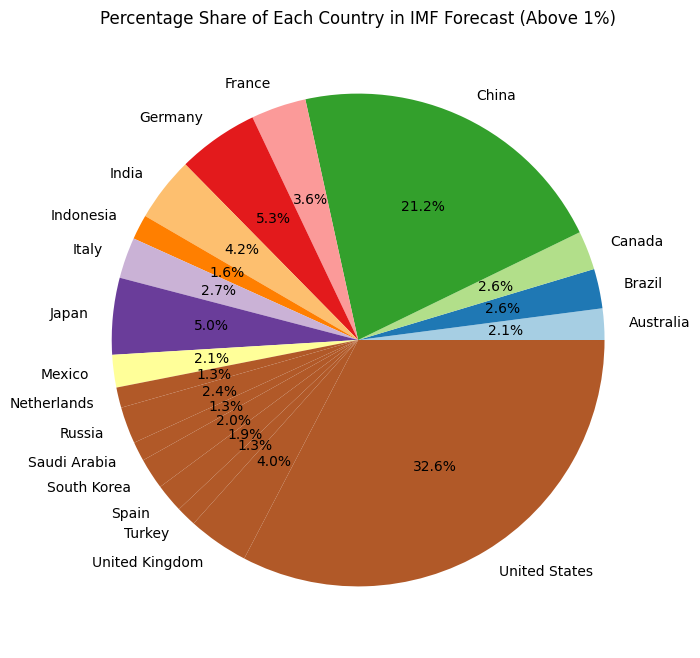

In [64]:
#WorldBank_2023
# Створюємо копію основного DataFrame
df_copy1 = df.copy()

# Заміна значень з анотаціями на '2023'
def replace_year(value):
    if isinstance(value, str):
        # Заміна всіх варіантів на '2024'
        return '2023' if re.search(r'\[n \d+\]2023', value) else value
    return value

df_copy1['WorldBank_Year'] = df_copy1['WorldBank_Year'].apply(replace_year)

# Фільтруємо дані для 2024 року
df_copy1['WorldBank_Year'] = df_copy1['WorldBank_Year'].where(df_copy1['WorldBank_Year'] == '2023', None)

# Видаляємо рядки з пропусками в 'IMF_Year'
df_copy1 = df_copy1.dropna(subset=['WorldBank_Year'])

# Перевіряємо чи значення у стовпці IMF_Forecast числові
df_copy1['WorldBank_Estimate'] = pd.to_numeric(df_copy1['WorldBank_Estimate'], errors='coerce')

# Вилучаємо рядок з назвою 'World'
df_copy1 = df_copy1[df_copy1['Country'] != 'World']

# Сумуємо значення у стовпці IMF_Forecast
total_forecast = df_copy1['WorldBank_Estimate'].sum()

# Рахуємо суму значень IMF_Forecast для кожної країни
country_forecasts = df_copy1.groupby('Country')['WorldBank_Estimate'].sum()

# Розраховуємо відсоткову частку для кожної країни
country_percentage = (country_forecasts / total_forecast) * 100

# Створюємо DataFrame для зручності
result = pd.DataFrame({
    'Country': country_percentage.index,
    'Percentage': country_percentage.values
})

# Відфільтровуємо країни, частка яких перевищує 1%
filtered_result = result[result['Percentage'] > 1]

# Візуалізуємо дані як кругову діаграму
plt.figure(figsize=(10, 8))
plt.pie(filtered_result['Percentage'], labels=filtered_result['Country'], autopct='%1.1f%%', colors=plt.cm.Paired(range(len(filtered_result['Country']))))
plt.title('Percentage Share of Each Country in IMF Forecast (Above 1%)')
plt.show()

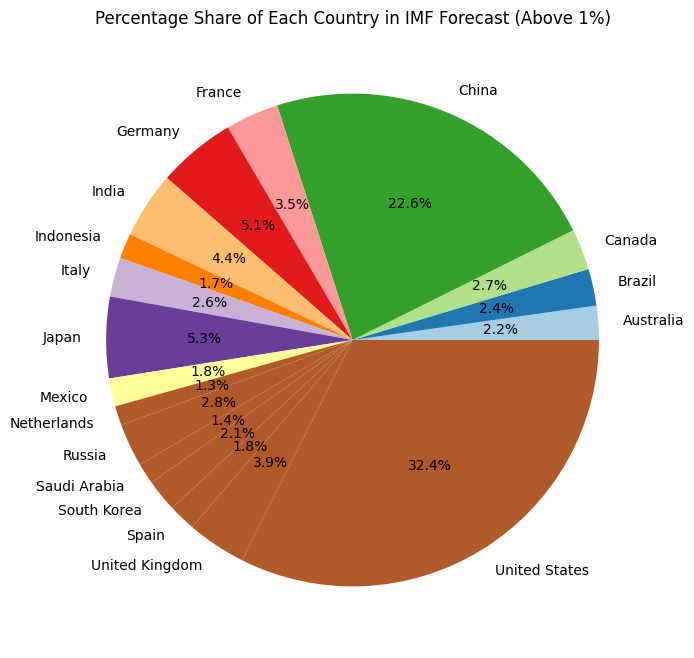

In [108]:
#OON_2022
# Створюємо копію основного DataFrame
df_copy2 = df.copy()

# Заміна значень з анотаціями на '2022'
def replace_year(value):
    if isinstance(value, str):
        # Заміна всіх варіантів на '2022'
        return '2022' if re.search(r'\[n \d+\]2022', value) else value
    return value

df_copy2['UN_Year'] = df_copy2['UN_Year'].apply(replace_year)

# Фільтруємо дані для 2024 року
df_copy2['UN_Year'] = df_copy2['UN_Year'].where(df_copy2['UN_Year'] == '2022', None)

# Видаляємо рядки з пропусками в 'IMF_Year'
df_copy2 = df_copy2.dropna(subset=['UN_Year'])

# Перевіряємо чи значення у стовпці IMF_Forecast числові
df_copy2['UN_Estimate'] = pd.to_numeric(df_copy2['UN_Estimate'], errors='coerce')

# Вилучаємо рядок з назвою 'World'
df_copy2 = df_copy2[df_copy2['Country'] != 'World']

# Сумуємо значення у стовпці IMF_Forecast
total_forecast = df_copy2['UN_Estimate'].sum()

# Рахуємо суму значень IMF_Forecast для кожної країни
country_forecasts = df_copy2.groupby('Country')['UN_Estimate'].sum()

# Розраховуємо відсоткову частку для кожної країни
country_percentage = (country_forecasts / total_forecast) * 100

# Створюємо DataFrame для зручності
result = pd.DataFrame({
    'Country': country_percentage.index,
    'Percentage': country_percentage.values
})

# Відфільтровуємо країни, частка яких перевищує 1%
filtered_result = result[result['Percentage'] > 1]

# Візуалізуємо дані як кругову діаграму
plt.figure(figsize=(10, 8))
plt.pie(filtered_result['Percentage'], labels=filtered_result['Country'], autopct='%1.1f%%', colors=plt.cm.Paired(range(len(filtered_result['Country']))))
plt.title('Percentage Share of Each Country in IMF Forecast (Above 1%)')
plt.show()


Завдання 2. 
Завантажити датасет Титанік з Kaggle (або
використовуйте вже завантажений файл titanic.csv)
Виконати попередній аналіз даних.

Визначте середній вік тих, хто вижив, і тих, хто не вижив. Чи
впливає вік на виживання (дати відповідь)

In [120]:
# Читаємо CSV-файл у DataFrame
df = pd.read_csv('titanic.csv')

df.head()

# Середній вік для тих, хто не вижив (Survived == 0)
average_age_not_survived = df[df['Survived'] == 0]['Age'].mean()

# Середній вік для тих, хто вижив (Survived == 1)
average_age_survived = df[df['Survived'] == 1]['Age'].mean()

# Виводимо результати
print(f"Середній вік тих, хто не вижив: {average_age_not_survived}")
print(f"Середній вік тих, хто вижив: {average_age_survived}")
#Так як середнє значення віку тих хто вижив та тих хто не вижив не мають великої різниці то можна зробити висновок, що вік не впливав на виживання в поточній ситуації

Середній вік тих, хто не вижив: 30.27273170731707
Середній вік тих, хто вижив: 30.27236220472441


Висновки

1) Перед початком роботи з датасетом взятим з відкритих джерел потрібно  ретельно підготувати його до роботи та перевірити кожний крок свого коду щоб впевнитися у відсутності помилки. На мою думку, в таких датасетах не слід довіряти полям які визначають суму всіх рядкув(в нашому випадку world) краще порахувати суму ссамостійно.
2) При виконанні аналітичних задач не потрібно поспішати з відповіддю на поставлене питання  так як результат аналітики д